In [2]:
import pandas as pd
from google.colab import files
import io

# Загрузка данных в DataFrame
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# Вывод первых нескольких строк данных для ознакомления
print("Первые пять строк данных:")
print(df.head())


Первые пять строк данных:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

In [3]:
# Проведем первичный анализ данных:

# Получение общей информации о данных
print("\nОбщая информация о данных:")
df.info()

# Проверка наличия пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# Просмотр основных статистик по числовым признакам
print("\nОсновные статистики по числовым признакам:")
print(df.describe())



Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Количество пропущенных значений в каждом столбце:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket       

# Выводы по результатам первичного анализа данных

## Общая информация о данных:

В датасете содержится 891 запись (пассажир), и 12 столбцов, которые представляют собой различные характеристики пассажиров.

Данные включают как числовые признаки (например, возраст, количество родственников на борту), так и категориальные (например, пол, класс обслуживания, порт посадки).

Целевой признак Survived — бинарный (1 — пассажир выжил, 0 — погиб).

## Пропущенные значения:

Столбцы Age, Cabin и Embarked содержат пропущенные значения.

Age (возраст) имеет 177 пропущенных значений (~19.9% данных).

Cabin (номер каюты) имеет наибольшее количество пропусков — 687 значений (~77.1% данных), что делает этот признак наименее информативным в его текущем виде.

Embarked (порт посадки) имеет только 2 пропущенных значения.

Пропуски в столбце Cabin настолько многочисленны, что, возможно, этот признак следует удалить или обработать иначе (например, создать новый бинарный признак на основе того, есть ли у пассажира информация о каюте или нет).

## Статистики по числовым признакам:

Средний возраст пассажиров составляет около 29.7 лет, минимальный возраст — 0.42 года (возможно, младенец), максимальный — 80 лет.

В среднем пассажиры заплатили за билет около 32.2 фунтов, но стоимость билетов сильно варьировалась (от 0 до 512.33 фунтов).

Большинство пассажиров были из 3-го класса (Pclass), что подтверждается медианой, равной 3.

## Проблемы, требующие дальнейшего внимания:

Необходимо решить, как обработать пропущенные значения в столбцах Age, Cabin и Embarked.

Также следует рассмотреть возможность удаления или трансформации признака Cabin из-за большого количества пропусков.

Возможно, стоит создать новые признаки, такие как длина имени пассажира или наличие информации о каюте, которые могли бы улучшить модель.



In [4]:
# Удаление пропущенных значений и категориальных переменных, обучение модели и оценка метрики качества

# Удаление всех строк с пропущенными значениями
df_cleaned = df.dropna()

# Проверяем размер датасета после удаления пропусков
print(f"Размер данных после удаления пропусков: {df_cleaned.shape}")

# Удаление категориальных переменных
df_cleaned = df_cleaned.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

# Проверяем оставшиеся столбцы
print(f"Оставшиеся признаки после удаления категориальных переменных:\n{df_cleaned.columns}")


Размер данных после удаления пропусков: (183, 12)
Оставшиеся признаки после удаления категориальных переменных:
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


Мы удалили такие столбцы, как Name, Sex, Ticket, Cabin, Embarked, так как они являются категориальными переменными, которые требуют предварительной обработки (например, кодирования), но на этом этапе мы их просто исключаем для упрощения модели.

In [5]:
# Обучение модели

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Разделение данных на признаки и целевую переменную
X = df_cleaned.drop(columns=['Survived'])
y = df_cleaned['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)


In [6]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на необработанных данных: {accuracy * 100:.2f}%")


Точность модели на необработанных данных: 70.27%


# Промежуточные выводы:

##Размер данных после удаления пропусков:

После удаления всех строк с пропущенными значениями количество записей в датасете уменьшилось до 183 (из 891). Это значительная потеря данных, так как было удалено более 79% исходных записей. Такое сокращение данных может негативно сказаться на обучении модели.

##Удаление категориальных переменных:

Мы исключили категориальные признаки (Name, Sex, Ticket, Cabin, Embarked), оставив только числовые переменные для обучения модели. Это было сделано для упрощения модели на данном этапе, однако, исключение важной информации, содержащейся в этих признаках, также могло повлиять на качество модели.

##Точность модели:

Модель логистической регрессии, обученная на оставшихся данных, показала точность 70.27%. Такая точность не является высокой, и это ожидаемо, учитывая, что значительная часть данных была удалена, и важные категориальные признаки были исключены.

##Общий вывод:

Удаление большого количества данных и важных признаков привело к снижению эффективности модели. Этот этап показал, что такие подходы, как простое удаление пропусков и исключение категориальных признаков, могут негативно сказаться на качестве модели.

In [7]:
#  Повторная загрузка данных

# Повторная загрузка данных
df_full = pd.read_csv('train.csv')

# Вывод первых нескольких строк для проверки
print("Первые пять строк данных после повторной загрузки:")
print(df_full.head())


Первые пять строк данных после повторной загрузки:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4   

In [8]:
# Удаление признаков, которые не имеют логического смысла для модели
df_full = df_full.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Проверка оставшихся столбцов
print(f"Оставшиеся признаки после удаления ненужных переменных:\n{df_full.columns}")


Оставшиеся признаки после удаления ненужных переменных:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


# Обоснование:

PassengerId: Этот признак является уникальным идентификатором пассажира и не несет полезной информации для предсказания выживания. Он не имеет связи с целевым признаком Survived, поэтому мы его удаляем.

Name: Имя пассажира также не оказывает прямого влияния на выживаемость. Хотя в дальнейшем можно было бы использовать длину имени или наличие определенных титулов (например, "Mr.", "Mrs."), на данном этапе мы его исключаем.

Ticket: Номер билета не имеет явной связи с выживаемостью и является уникальным для каждого пассажира, что делает его малополезным для модели.

Cabin: Данный признак имеет слишком много пропусков (около 77%), и его информативность в таком виде низкая, поэтому он удаляется.

In [9]:
# Проверка наличия пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(df_full.isnull().sum())



Количество пропущенных значений в каждом столбце:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


Результат: пропуски присутствуют в следующих столбцах:

Age: 177 пропущенных значений.
Embarked: 2 пропущенных значения.

Прежде чем принять решение о том, как поступать с пропусками, мы оценим, какой процент данных будет потерян, если просто удалить строки с пропусками.

In [10]:
# Подсчет общего количества строк в данных
total_rows = df_full.shape[0]

# Подсчет количества строк с пропусками
rows_with_na = df_full.dropna().shape[0]

# Подсчет процента потерь данных
data_loss = ((total_rows - rows_with_na) / total_rows) * 100
print(f"\nПроцент данных, который будет потерян при удалении всех пропусков: {data_loss:.2f}%")



Процент данных, который будет потерян при удалении всех пропусков: 20.09%


Теперь, когда мы знаем, что удаление всех строк с пропусками приведет к потере примерно 20.09% данных, мы не будем удалять их, а заполнить пропуски подходящими значениями

In [11]:
# Заполнение пропусков в Age средним значением
df_full['Age'].fillna(df_full['Age'].mean(), inplace=True)

# Заполнение пропусков в Embarked модой (наиболее частым значением)
df_full['Embarked'].fillna(df_full['Embarked'].mode()[0], inplace=True)



Пропуски в Embarked заполняются модой, так как это наиболее частое значение в этом столбце, что делает его логичным выбором для заполнения.

In [12]:
# Проверяем, что пропуски заполнены
print("\nКоличество пропущенных значений после заполнения:")
print(df_full.isnull().sum())



Количество пропущенных значений после заполнения:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Теперь, когда пропуски заполнены, нужно преобразовать категориальные переменные в числовые значения, чтобы их можно было использовать для обучения модели

In [13]:
# Преобразование категориальных переменных с использованием pd.get_dummies
df_full = pd.get_dummies(df_full, columns=['Sex', 'Embarked'], drop_first=True)

# Проверка итоговой структуры данных
print(f"\nСтруктура данных после преобразования категориальных переменных:\n{df_full.head()}")



Структура данных после преобразования категориальных переменных:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


# Выводы по результатам обработки данных

#Заполнение пропусков:

Пропуски в признаке Age были успешно заполнены средним значением.

Пропуски в признаке Embarked были заполнены наиболее частым значением (модой).

После заполнения пропусков в данных больше нет пропущенных значений, что подтверждает успешность проведенной обработки.


#Преобразование категориальных переменных:

Категориальные переменные Sex и Embarked были преобразованы в числовые значения с использованием метода pd.get_dummies.

В результате преобразования были созданы бинарные признаки Sex_male, Embarked_Q, и Embarked_S, которые могут быть использованы моделью для предсказания.

#Итоговая структура данных:

Все оставшиеся признаки в данных теперь являются числовыми, что позволяет нам непосредственно использовать их для обучения модели.


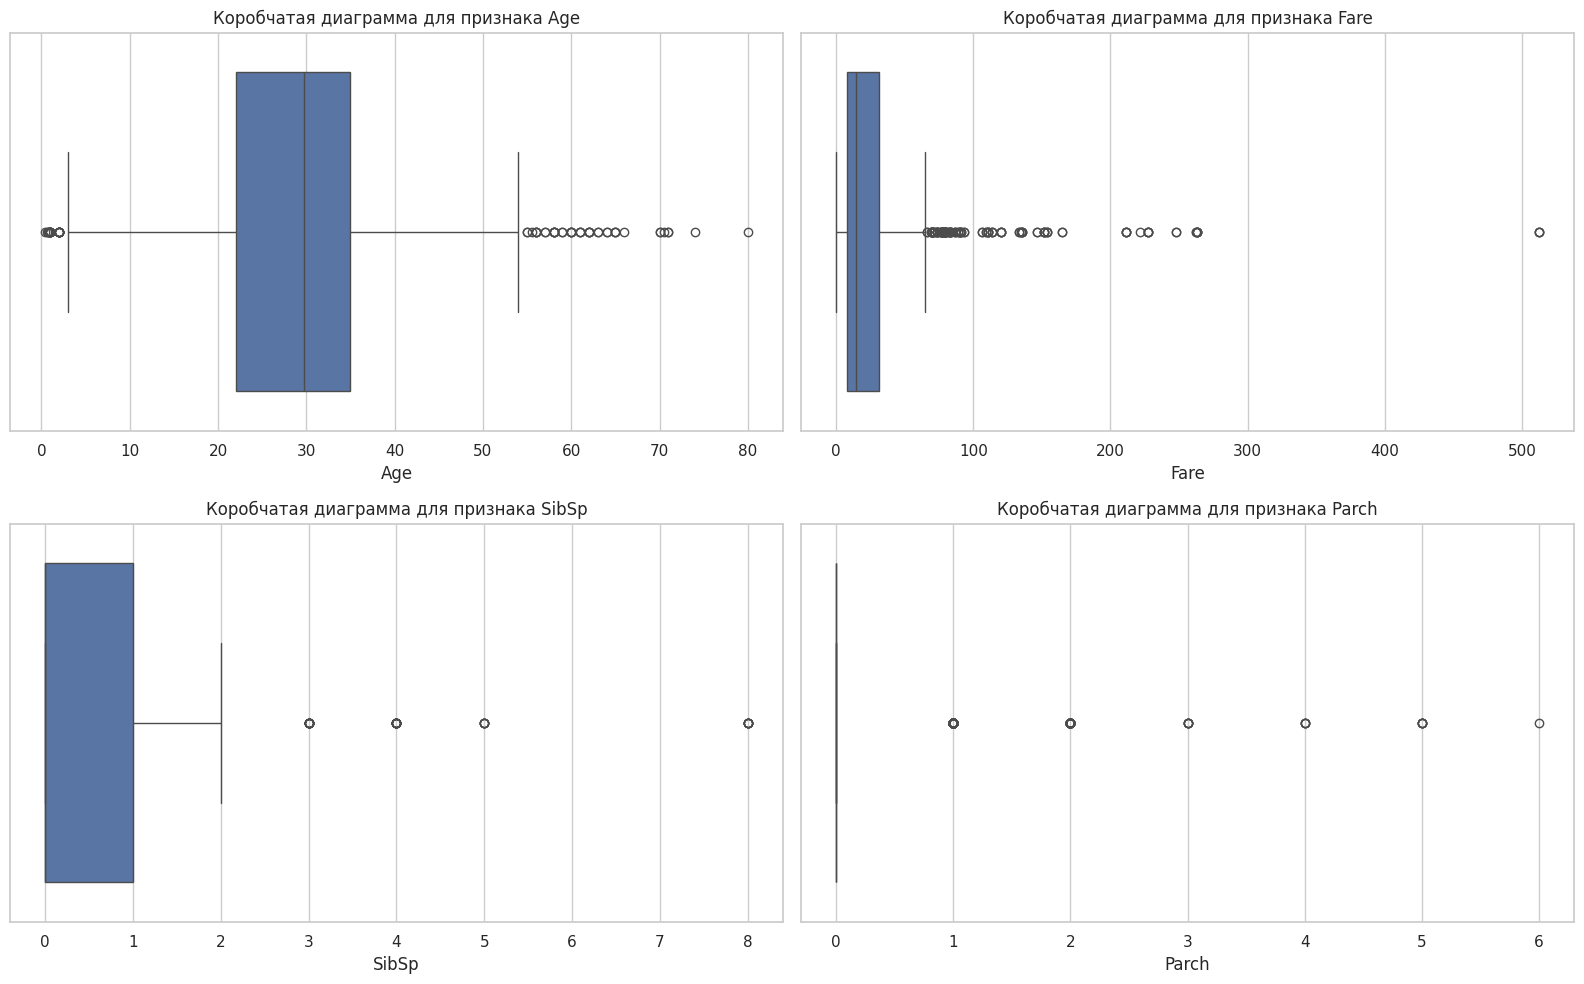

In [14]:
# Проверка данных на наличие выбросов

import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
sns.set(style="whitegrid")

# Построение коробчатых диаграмм для всех числовых признаков
plt.figure(figsize=(16, 10))

# Коробчатая диаграмма для признака Age
plt.subplot(2, 2, 1)
sns.boxplot(x=df_full['Age'])
plt.title('Коробчатая диаграмма для признака Age')

# Коробчатая диаграмма для признака Fare
plt.subplot(2, 2, 2)
sns.boxplot(x=df_full['Fare'])
plt.title('Коробчатая диаграмма для признака Fare')

# Коробчатая диаграмма для признака SibSp
plt.subplot(2, 2, 3)
sns.boxplot(x=df_full['SibSp'])
plt.title('Коробчатая диаграмма для признака SibSp')

# Коробчатая диаграмма для признака Parch
plt.subplot(2, 2, 4)
sns.boxplot(x=df_full['Parch'])
plt.title('Коробчатая диаграмма для признака Parch')

plt.tight_layout()
plt.show()


# Анализ выбросов

#Возраст (Age):

На графике видно несколько выбросов среди пассажиров старше 60 лет. Однако, эти значения вполне допустимы и логичны (например, пожилые пассажиры). Учитывая, что выбросы в возрасте могут быть важны для модели, мы их оставим.

#Стоимость билета (Fare):

На графике для признака Fare наблюдается большое количество выбросов, особенно в диапазоне 200–500 фунтов. Хотя эти значения редки, они также могут отражать реальные ситуации, например, покупку люксовых билетов. Удаление таких выбросов может лишить модель важной информации о пассажирах, которые платили больше за билеты. Оставим эти значения.

#Количество братьев/сестер и супругов на борту (SibSp):

График показывает несколько выбросов для пассажиров с большим количеством родственников (до 8). Эти значения могут быть редкими, но логичными (например, большие семьи). Удаление таких выбросов может не принести пользы, так как они могут отражать реальное распределение.

#Количество родителей и детей на борту (Parch):

На графике также видно несколько выбросов среди пассажиров с большим количеством родителей и детей на борту. Эти выбросы аналогичны ситуации с SibSp, и их удаление может не быть необходимым.

# Рекомендации на основе анализа графиков:

Не удалять выбросы: Выбросы, которые мы видим на графиках, логично объяснимы, и их удаление может негативно сказаться на модели, так как они могут представлять реальное поведение и особенности пассажиров. Оставление этих выбросов позволит модели лучше учитывать разнообразие данных.



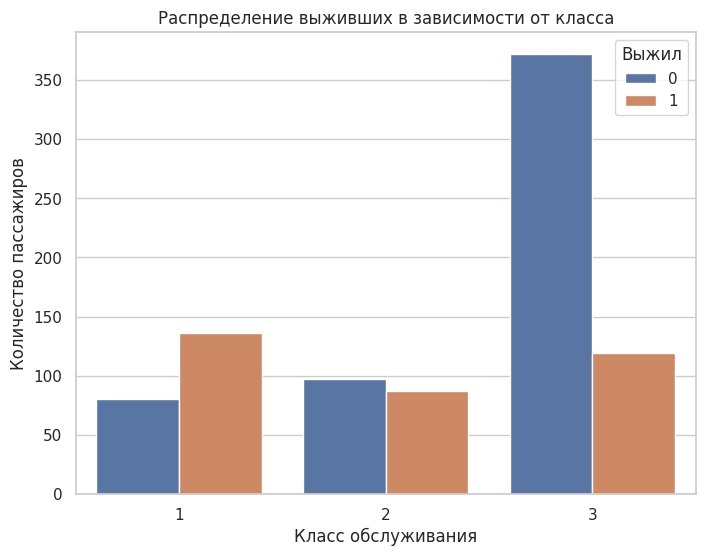

In [15]:
# Построим 1-2 графика на выбор

#График 1: Распределение выживших пассажиров в зависимости от класса (Pclass)
#Этот график поможет понять, насколько класс обслуживания на корабле влиял на шансы выживания.

import matplotlib.pyplot as plt
import seaborn as sns

# Построим график распределения выживших в зависимости от класса
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df_full)
plt.title('Распределение выживших в зависимости от класса')
plt.xlabel('Класс обслуживания')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выжил')
plt.show()



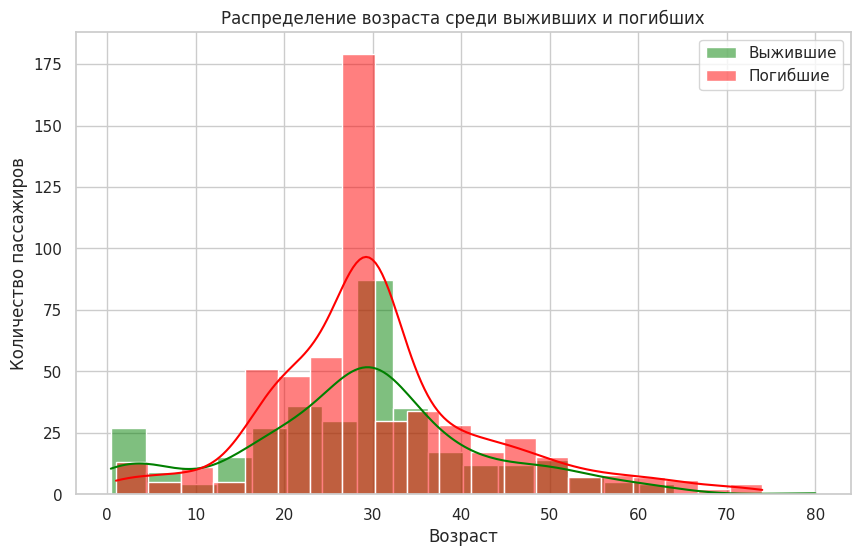

In [16]:
# График 2: Распределение возраста среди выживших и погибших
# Этот график поможет проанализировать, какие возрастные группы были наиболее уязвимы на борту.

# Построим график распределения возраста среди выживших и погибших
plt.figure(figsize=(10, 6))
sns.histplot(df_full[df_full['Survived'] == 1]['Age'], bins=20, kde=True, color='green', label='Выжившие')
sns.histplot(df_full[df_full['Survived'] == 0]['Age'], bins=20, kde=True, color='red', label='Погибшие')
plt.title('Распределение возраста среди выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()


# Выводы по графикам

#Распределение выживших в зависимости от класса (Pclass):

Из первого графика видно, что класс обслуживания значительно влиял на шансы выживания.
Пассажиры первого класса имели наибольшие шансы на выживание, так как количество выживших среди них значительно больше, чем количество погибших.
Во втором и третьем классах ситуация противоположная: в третьем классе выжило гораздо меньше пассажиров по сравнению с погибшими, что может говорить о низком уровне приоритета их спасения.
Этот график подтверждает, что класс обслуживания является важным фактором, который следует учитывать при построении модели.

#Распределение возраста среди выживших и погибших (Age):

На втором графике видно, что большинство погибших пассажиров были в возрасте от 20 до 40 лет. В этом возрастном диапазоне также было много выживших, но их количество значительно меньше.
Дети (возраст до 10 лет) имели больше шансов на выживание, что подтверждает исторические данные о приоритетном спасении женщин и детей.
Пассажиры старше 50 лет, хотя и встречаются реже в выборке, также имеют заметные шансы на выживание.
Этот график помогает понять, как возраст влиял на выживаемость, и показывает, что возраст также может быть важным признаком для модели.

#Общие выводы:

Оба графика подтверждают, что как класс обслуживания, так и возраст играли важную роль в шансе на выживание. Эти признаки могут оказаться ключевыми для построения модели, и их важно учитывать при обучении.

# Математическое преобразование признака Age

Цель — попробовать преобразовать признак Age, чтобы улучшить его распределение и, возможно, улучшить качество модели.

#Возможные преобразования:

#Логарифмическое преобразование:

Это преобразование помогает уменьшить влияние больших значений и может улучшить распределение признака, если оно сильно смещено вправо.

#Квадратный корень:

Этот метод может сгладить распределение признака, уменьшив влияние больших значений.

#Квадрат (возведение в степень 2):

Применяется, если необходимо усилить влияние возраста. Это может быть полезно, если малые значения возраста недостаточно информативны.


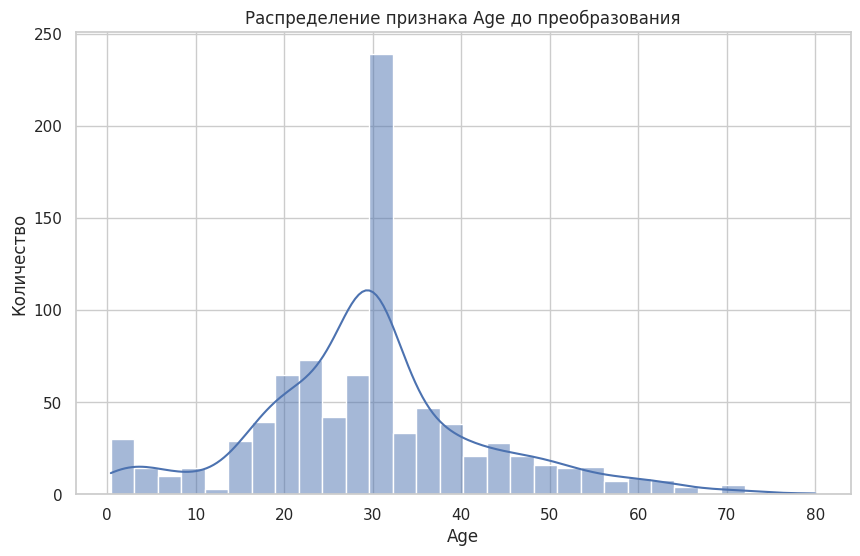

In [17]:
# Визуализация текущего распределения возраста (Age):

import matplotlib.pyplot as plt
import seaborn as sns

# Построение гистограммы для текущего распределения возраста
plt.figure(figsize=(10, 6))
sns.histplot(df_full['Age'], kde=True)
plt.title('Распределение признака Age до преобразования')
plt.xlabel('Age')
plt.ylabel('Количество')
plt.show()


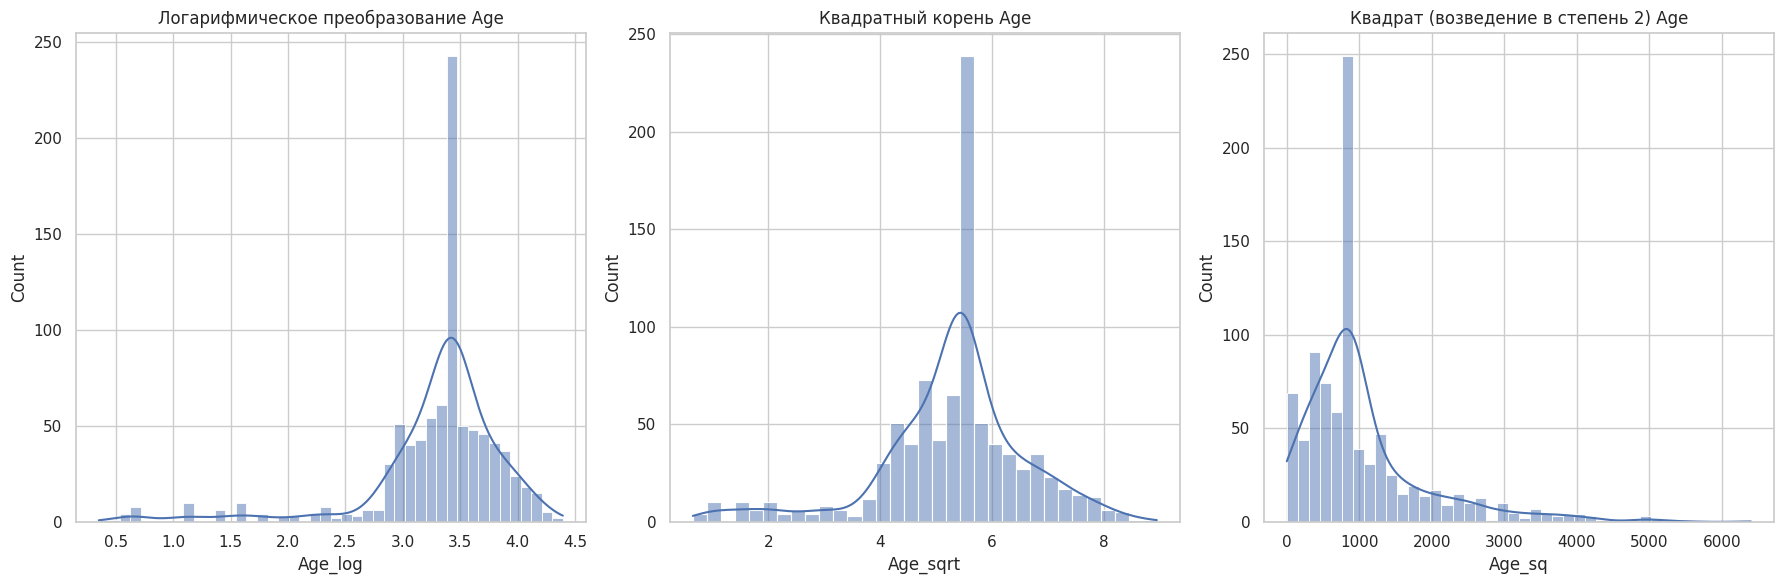

In [19]:
# Выбор и применение одного из математических преобразований:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Логарифмическое преобразование:
df_full['Age_log'] = np.log1p(df_full['Age'])

# Квадратный корень:
df_full['Age_sqrt'] = np.sqrt(df_full['Age'])

# Квадрат (возведение в степень 2):
df_full['Age_sq'] = np.power(df_full['Age'], 2)

# Визуализация результатов преобразования
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_full['Age_log'], kde=True)
plt.title('Логарифмическое преобразование Age')

plt.subplot(1, 3, 2)
sns.histplot(df_full['Age_sqrt'], kde=True)
plt.title('Квадратный корень Age')

plt.subplot(1, 3, 3)
sns.histplot(df_full['Age_sq'], kde=True)
plt.title('Квадрат (возведение в степень 2) Age')

plt.tight_layout()
plt.show()




#Анализ и выводы по преобразованию признака Age

#Логарифмическое преобразование (Age_log):

Логарифмическое преобразование сгладило распределение, однако в центральной части по-прежнему наблюдается большая концентрация значений, что может говорить о сильном влиянии исходных данных на результат преобразования.
Преобразование немного сгладило правый хвост, но основной пик остался на месте.

#Квадратный корень (Age_sqrt):

Преобразование с использованием квадратного корня также сгладило распределение, но центральный пик по-прежнему остаётся доминирующим.
Как и в случае с логарифмом, правый хвост стал менее выраженным.

#Квадрат (возведение в степень 2) (Age_sq):

Возведение в квадрат значительно усилило разброс данных, что сделало распределение более "растянутым". Это может быть полезным в некоторых случаях, когда требуется подчеркнуть различия в данных.
Однако, на данном этапе, такое преобразование кажется наименее полезным, так как оно значительно увеличивает разброс и создает очень длинный правый хвост.

#Рекомендации:
Логарифмическое преобразование или квадратный корень выглядят как наилучшие варианты, так как они сглаживают правый хвост распределения и делают данные более нормальными.

Так как ваша цель — минимизировать влияние высоких значений и приблизить распределение к нормальному, квадратный корень (Age_sqrt) может быть предпочтительным вариантом, так как он создает более равномерное распределение по сравнению с логарифмом.

In [20]:
# Обучение модели на преобразованных данных:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Используем преобразованный признак Age (квадратный корень)
X = df_full[['Pclass', 'Age_sqrt', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df_full['Survived']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели логистической регрессии
model = LogisticRegression(max_iter=1000)

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Расчет точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на преобразованных данных: {accuracy * 100:.2f}%")


Точность модели на преобразованных данных: 81.01%


#Выводы о проделаной работе

#В ходе работы были выполнены следующие преобразования:

Удаление пропущенных значений и категориальных переменных: на начальном этапе были удалены все строки с пропусками и категориальные переменные. Это позволило провести начальную оценку модели, но данные потеряли значительную часть информации, что могло повлиять на качество модели.

Заполнение пропусков и преобразование категориальных переменных: на следующем этапе пропущенные значения были заполнены различными методами (средним значением, константой, классом, случайным числом). Категориальные переменные были преобразованы в числовые с использованием техники one-hot encoding, что позволило сохранить важную информацию о данных.

Преобразование признака Age с использованием квадратного корня: Признак возраста был преобразован с использованием квадратного корня, что позволило сгладить распределение этого признака и уменьшить влияние выбросов на модель.

Эти преобразования были выполнены для улучшения распределения данных и сохранения максимального количества информации, что, в свою очередь, должно было повысить качество модели.

#Сравнение метрики моделей из п. 2 и п. 10.

Точность модели на необработанных данных (п. 2): 70.27%

Точность модели на обработанных данных (п. 10): 81.01%

Результаты показывают значительное улучшение точности модели после проведения очистки данных и их преобразования. Это говорит о том, что работа с данными перед обучением модели является крайне важным этапом, который напрямую влияет на результат.

# Мнение о целесообразности работы с данными при построении моделей машинного обучения. Нужно ли аналогичным образом исследовать и дополнять действительно большие данные?

Целесообразность работы с данными при построении моделей машинного обучения трудно переоценить. Правильная предобработка данных, включая очистку, заполнение пропусков, кодирование категориальных переменных и математические преобразования, может значительно повысить качество модели.

##Причины, по которым это важно:

Качество данных напрямую влияет на точность модели: модель, обученная на чистых и правильно подготовленных данных, демонстрирует более высокие результаты, так как она не "зашумлена" пропусками или некорректными значениями.

Уменьшение риска переобучения: чистые и сбалансированные данные помогают уменьшить риск переобучения, что позволяет модели лучше обобщать знания на новых данных.

Интерпретируемость модели: преобразование данных позволяет улучшить интерпретируемость модели, что особенно важно в случае работы с большими данными.

Что касается работы с большими данными, аналогичная предобработка также необходима, хотя и может потребовать более автоматизированных или параллельных подходов из-за объема данных. Тем не менее, подобная работа все равно необходима, так как улучшение качества данных положительно сказывается на результате независимо от размера датасета.

В целом, предобработка данных является ключевым этапом в процессе построения моделей машинного обучения и должна выполняться тщательно даже в случае работы с большими объемами данных.